# Sentiment and Predictive Analyses

In [1]:
# First, identify a social issue (e.g, student loan forgiveness) and find a reddit post about it. The post should have at least 1000 comments (let me know if there is any post you are really interested in but have less than 1000 comments).
# You are expected to scrape the comments (include the date created and the number of ups and downs the comments have attracted), pre-process the data, run a sentiment analysis (using both text blob and VADER), and conduct exploratory data analysis.
# In addition to this, create two columns - the first to consist of the number of characters in each comment, and the other to include the number of words in each comment.
# Second, you will build a Machine Learning model to predict the chances that a comment has a positive or negative sentiment.
# To do this, filter only the comments with positive and negative sentiments.
# Use the sentiment variable (with two categories - positive sentiment and negative sentiment) as your target variable, and use at least any three of number of ups, downs, character, words, as your features.
# As expected, you are to check for your model’s accuracy by presenting the necessary evaluation metrics (e.g, accuracy, precision, etc).

# **Scrapping Reddit Comments**

In [195]:
#import libraries
!pip install praw
import requests
import pandas as pd
import praw

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [196]:
# Passing in my details
reddit = praw.Reddit(client_id='qQlImwvA1Q15gpnrhJqdWg',
                     client_secret='M2dwzgknaKMhx4HFrMV_4v6efEHWYw',
                     user_agent='QMSS P3')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [197]:
# URL of the post
url = "https://www.reddit.com/r/Futurology/comments/124o5st/ai_systems_like_chatgpt_could_impact_300_million/"

# Creating a submission object
submission = reddit.submission(url=url)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from praw.models import MoreComments  # Importing needed function from praw package
import pandas as pd

# Create an empty list to store comments and their metadata
post_comments = []

# Replace all instances of "MoreComments" objects in the comment forest
submission.comments.replace_more(limit=None)

# Loop through all comments in the submission, including those replaced
for comment in submission.comments.list():
    # Check if the current comment is an instance of MoreComments
    if type(comment) == MoreComments:
        continue  # Skip to the next iteration if it is

    # Append the body, upvotes, downvotes, and creation timestamp of the comment to the list
    post_comments.append([comment.body, comment.ups, comment.downs, comment.created])

# Convert the list into a DataFrame with appropriate column names
reddit_data = pd.DataFrame(post_comments, columns=['comment', 'ups', 'downs', 'created'])

# Display the DataFrame
reddit_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is str

In [ ]:
# Converting the created date to what we can easily read

from datetime import datetime

reddit_data['date_time'] = pd.to_datetime(reddit_data['created'],  unit='s')    # this passes all the time details, including time. # The unit specify what unit our int is is away from the origin
reddit_data['date'] = reddit_data['date_time'].dt.strftime('%Y-%m-%d') # Now we have created a formatted string, with only the date

reddit_data.head()

In [ ]:
# Counting characters in the 'text_column'
reddit_data['character_count'] = reddit_data['comment'].apply(lambda x: len(x))
reddit_data

In [ ]:
# Counting words in the 'text_column'
reddit_data['word_count'] = reddit_data['comment'].apply(lambda x: len(x.split()))
reddit_data

In [ ]:
# Remove the duplicate
reddit_data1 = reddit_data
reddit_data1.drop_duplicates(subset='comment', keep='last', inplace=True)
reddit_data1.shape #view dimension of data to see how many data points remain after cleaning

# **Data Pre-Processing**

In [10]:
reddit_data1

,comment,ups,downs,created,date_time,date,character_count,word_count
0,The following submission statement was provide...,1,0,1.680011e+09,2023-03-28 13:43:44,2023-03-28,2023,303
1,Just think of all the money shareholders could...,6686,0,1.680011e+09,2023-03-28 13:41:09,2023-03-28,104,18
2,"Now, in an ideal world, this would lead to an ...",503,0,1.680032e+09,2023-03-28 19:31:46,2023-03-28,301,53
3,Already looking to update my job title to *AI ...,504,0,1.680015e+09,2023-03-28 14:42:25,2023-03-28,63,11
4,Teams of 5 are going to turn into teams of 1 r...,250,0,1.680012e+09,2023-03-28 14:05:03,2023-03-28,55,13
...,...,...,...,...,...,...,...,...
2723,Sounds like you have all the answers oh wise o...,0,0,1.680098e+09,2023-03-29 13:52:21,2023-03-29,112,26
2724,I don't disagree with anything you wrote here.,0,0,1.680046e+09,2023-03-28 23:30:40,2023-03-28,46,8
2725,I’m not saying that AI is on the same exponent...,1,0,1.680094e+09,2023-03-29 12:49:45,2023-03-29,630,111
2726,"Christ, you really got upset quickly.",1,0,1.680114e+09,2023-03-29 18:24:48,2023-03-29,37,6


In [11]:
# HERE, WE ARE REMOVING UNNECESSAARY SYMBOLS AND STOPWORDS
# This bunch of code relies heavily on regular expression (re). You can read more about it here: https://docs.python.org/3/library/re.html, https://www.analyticsvidhya.com/blog/2015/06/regular-expression-python/ and https://www.tutorialspoint.com/python3/python_reg_expressions.htm

# regular expresion (re) helps to find and replace pattern in a file or string.
# Some of the commonly use ones are: re.match(), re.search(), re.findall(), re.split(), re.sub()


import re                                                                       # Import  regular expression

import nltk                                                                     # Import Imports the Natural Language Toolkit library
nltk.download('stopwords')                                                      # Downloads a set of commonly used stopwords
from nltk.corpus import stopwords                                               # Imports the stopwords from the NLTK corpus
STOPWORDS = set(stopwords.words('english'))                                     # Creates a set of English stopwords from NLTK's corpus

#Reddit text cleaning
def reddit_clean (redd):                                                        # Create a function called reddit_clean
    redd = str(redd).lower()                                                    # Converts the text to lowercase
    redd = re.sub("'", "", redd)                                                # Removes single quotes
    redd = re.sub("@[A-Za-z0-9_]+","", redd)                                    # Removes patterns that start with '@'
    redd = re.sub("#[A-Za-z0-9_]+","", redd)                                    # Removes patterns that start with '#'
    redd = re.sub(r"www.\S+", "", redd)                                         # Removes URLs that start with 'www.'
    redd = re.sub(r"http\S+", "", redd)                                         # Removes URLs.
    redd = re.sub('[()!?]', ' ', redd)                                          # Replaces parentheses, exclamation marks, and question marks with spaces
    redd = re.sub('\[.*?\]',' ', redd)                                          # Removes text within square brackets
    redd = re.sub("[^a-z0-9]"," ", redd)                                        # Replaces non-alphanumeric characters with spaces.
    redd = re.sub(r"\b\w{1,3}\b"," ", redd)                                     # Removes words with less than 4 characters.
    redd = redd.split()                                                         # Splits the text into a list of words
    stopwords = STOPWORDS                                                       # Assigns the set of stopwords to a variable called stopwords
    redd = [w for w in redd if not w in stopwords]                              # Removes stopwords from the list of words
    redd = " ".join(word for word in redd)                                      # Joins the remaining words back into a string
    return redd                                                                 # Returns the cleaned text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
reddit_data1['comment'] = reddit_data1['comment'].apply(reddit_clean)           # Applies the reddit_clean function to clean the 'comment' column of the DataFrame reddit_data1
reddit_data1.head()                                                             # Displays the first few rows of the cleaned DataFrame

,comment,ups,downs,created,date_time,date,character_count,word_count
0,following submission statement provided chrisd...,1,0,1.680011e+09,2023-03-28 13:43:44,2023-03-28,2023,303
1,think money shareholders could save highly pai...,6686,0,1.680011e+09,2023-03-28 13:41:09,2023-03-28,104,18
2,ideal world would lead increase leisure person...,503,0,1.680032e+09,2023-03-28 19:31:46,2023-03-28,301,53
3,already looking update title connoisseur lmao,504,0,1.680015e+09,2023-03-28 14:42:25,2023-03-28,63,11
4,teams going turn teams real fast,250,0,1.680012e+09,2023-03-28 14:05:03,2023-03-28,55,13


In [13]:
# Tokenize the comments
tokenized_reddit_post = reddit_data1['comment'].apply(lambda x: x.split())
print(tokenized_reddit_post)

0       [following, submission, statement, provided, c...
1       [think, money, shareholders, could, save, high...
2       [ideal, world, would, lead, increase, leisure,...
3       [already, looking, update, title, connoisseur,...
4                 [teams, going, turn, teams, real, fast]
                              ...                        
2723            [sounds, like, answers, wise, tell, need]
2724                    [dont, disagree, anything, wrote]
2725    [saying, exponential, curve, technology, could...
2726                     [christ, really, upset, quickly]
2727    [said, previous, comment, think, fucked, basic...
Name: comment, Length: 2562, dtype: object


In [14]:
#Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.
#For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
tokenized_reddit_post = tokenized_reddit_post.apply(lambda x: [stemmer.stem(i) for i in x])
reddit_data1['tokenized']= tokenized_reddit_post
reddit_data1.head()

,comment,ups,downs,created,date_time,date,character_count,word_count,tokenized
0,following submission statement provided chrisd...,1,0,1.680011e+09,2023-03-28 13:43:44,2023-03-28,2023,303,"[follow, submiss, statement, provid, chrisdh79..."
1,think money shareholders could save highly pai...,6686,0,1.680011e+09,2023-03-28 13:41:09,2023-03-28,104,18,"[think, money, sharehold, could, save, highli,..."
2,ideal world would lead increase leisure person...,503,0,1.680032e+09,2023-03-28 19:31:46,2023-03-28,301,53,"[ideal, world, would, lead, increas, leisur, p..."
3,already looking update title connoisseur lmao,504,0,1.680015e+09,2023-03-28 14:42:25,2023-03-28,63,11,"[alreadi, look, updat, titl, connoisseur, lmao]"
4,teams going turn teams real fast,250,0,1.680012e+09,2023-03-28 14:05:03,2023-03-28,55,13,"[team, go, turn, team, real, fast]"


# **Sentiment Analysis using Textblob**

In [15]:
# Importing some more libraries
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from textblob import TextBlob     # This is the first library we are using for the sentiment analysis.
#The sentiment function of textblob returns two properties, polarity, and subjectivity. Polarity is float which lies in the range of [-1,1] where 1 means positive statement
#and -1 means a negative statement.
#Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information.
#Subjectivity is also a float which lies in the range of [0,1].

def get_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def get_subjectivity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity

reddit_data1['polarity'] = reddit_data1['comment'].apply(get_polarity)
reddit_data1['subjectivity'] = reddit_data1['comment'].apply(get_subjectivity)
reddit_data1.head()

,comment,ups,downs,created,date_time,date,character_count,word_count,tokenized,polarity,subjectivity
0,following submission statement provided chrisd...,1,0,1.680011e+09,2023-03-28 13:43:44,2023-03-28,2023,303,"[follow, submiss, statement, provid, chrisdh79...",0.037885,0.421731
1,think money shareholders could save highly pai...,6686,0,1.680011e+09,2023-03-28 13:41:09,2023-03-28,104,18,"[think, money, sharehold, could, save, highli,...",0.160000,0.540000
2,ideal world would lead increase leisure person...,503,0,1.680032e+09,2023-03-28 19:31:46,2023-03-28,301,53,"[ideal, world, would, lead, increas, leisur, p...",0.384091,0.575000
3,already looking update title connoisseur lmao,504,0,1.680015e+09,2023-03-28 14:42:25,2023-03-28,63,11,"[alreadi, look, updat, titl, connoisseur, lmao]",0.600000,1.000000
4,teams going turn teams real fast,250,0,1.680012e+09,2023-03-28 14:05:03,2023-03-28,55,13,"[team, go, turn, team, real, fast]",0.300000,0.900000


In [17]:
# Create a function to classify the polarity
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    if sentiment_polarity > 0:
        return 'Positive Sentiment'
    elif sentiment_polarity == 0:
        return 'Neutral Sentiment'
    else:
        return 'Negative Sentiment'

In [18]:
# We create a sentiment column with the function created:
reddit_data1['sentiment_textblob'] = reddit_data1['comment'].apply(analyze_sentiment)
reddit_data1.head()

,comment,ups,downs,created,date_time,date,character_count,word_count,tokenized,polarity,subjectivity,sentiment_textblob
0,following submission statement provided chrisd...,1,0,1.680011e+09,2023-03-28 13:43:44,2023-03-28,2023,303,"[follow, submiss, statement, provid, chrisdh79...",0.037885,0.421731,Positive Sentiment
1,think money shareholders could save highly pai...,6686,0,1.680011e+09,2023-03-28 13:41:09,2023-03-28,104,18,"[think, money, sharehold, could, save, highli,...",0.160000,0.540000,Positive Sentiment
2,ideal world would lead increase leisure person...,503,0,1.680032e+09,2023-03-28 19:31:46,2023-03-28,301,53,"[ideal, world, would, lead, increas, leisur, p...",0.384091,0.575000,Positive Sentiment
3,already looking update title connoisseur lmao,504,0,1.680015e+09,2023-03-28 14:42:25,2023-03-28,63,11,"[alreadi, look, updat, titl, connoisseur, lmao]",0.600000,1.000000,Positive Sentiment
4,teams going turn teams real fast,250,0,1.680012e+09,2023-03-28 14:05:03,2023-03-28,55,13,"[team, go, turn, team, real, fast]",0.300000,0.900000,Positive Sentiment


In [19]:
# Create a new subjectivity column
reddit_data1['subjectivity2'] = np.where(reddit_data1['subjectivity'] > 0.5, 'Subjective', 'Objective')
reddit_data1.head()

,comment,ups,downs,created,date_time,date,character_count,word_count,tokenized,polarity,subjectivity,sentiment_textblob,subjectivity2
0,following submission statement provided chrisd...,1,0,1.680011e+09,2023-03-28 13:43:44,2023-03-28,2023,303,"[follow, submiss, statement, provid, chrisdh79...",0.037885,0.421731,Positive Sentiment,Objective
1,think money shareholders could save highly pai...,6686,0,1.680011e+09,2023-03-28 13:41:09,2023-03-28,104,18,"[think, money, sharehold, could, save, highli,...",0.160000,0.540000,Positive Sentiment,Subjective
2,ideal world would lead increase leisure person...,503,0,1.680032e+09,2023-03-28 19:31:46,2023-03-28,301,53,"[ideal, world, would, lead, increas, leisur, p...",0.384091,0.575000,Positive Sentiment,Subjective
3,already looking update title connoisseur lmao,504,0,1.680015e+09,2023-03-28 14:42:25,2023-03-28,63,11,"[alreadi, look, updat, titl, connoisseur, lmao]",0.600000,1.000000,Positive Sentiment,Subjective
4,teams going turn teams real fast,250,0,1.680012e+09,2023-03-28 14:05:03,2023-03-28,55,13,"[team, go, turn, team, real, fast]",0.300000,0.900000,Positive Sentiment,Subjective


In [20]:
# Counting the number of sentiment for each case of positive, negative and neutral.
reddit_data1['sentiment_textblob'].value_counts()

sentiment_textblob
Positive Sentiment    1406
Neutral Sentiment      635
Negative Sentiment     521
Name: count, dtype: int64

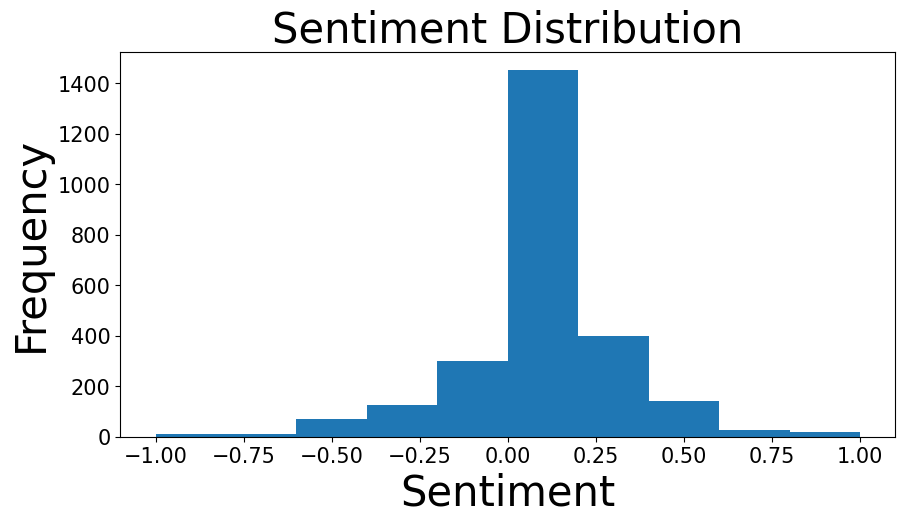

In [21]:
# Bar chart of the sentiment
plt.figure(figsize=(10,5))
plt.xlabel('Sentiment', fontsize=30)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=15)
plt.hist(reddit_data1['polarity'], bins=10)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

In [22]:
# Counting the number of cases that fall within each subjectivity category
reddit_data1['subjectivity2'].value_counts()

subjectivity2
Objective     1613
Subjective     949
Name: count, dtype: int64

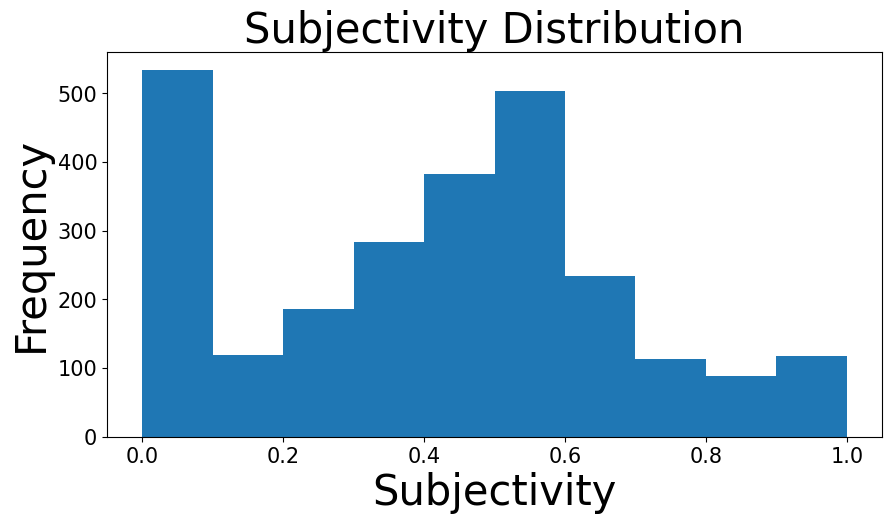

In [23]:
# Bar chart of the subjectivity
plt.figure(figsize=(10,5))
plt.xlabel('Subjectivity', fontsize=30)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=15)
plt.hist(reddit_data1['subjectivity'], bins=10)
plt.title('Subjectivity Distribution', fontsize=30)
plt.show()

In [24]:
# Summary Statistics of polarity and subjectivity
pol_sub = reddit_data1[["polarity", "subjectivity"]]
pol_sub.describe()                    # Even though there are more positive sentiment sentences, overall the average polarity is around 0.06

,polarity,subjectivity
count,2562.000000,2562.000000
mean,0.078334,0.401839
std,0.234279,0.273679
min,-1.000000,0.000000
25%,0.000000,0.175694
50%,0.037500,0.439206
75%,0.200000,0.576533
max,1.000000,1.000000


In [25]:
# Crosstabs
pd.crosstab(reddit_data1['sentiment_textblob'], reddit_data1['subjectivity2'])

subjectivity2,Objective,Subjective
sentiment_textblob,,
Negative Sentiment,248,273
Neutral Sentiment,594,41
Positive Sentiment,771,635


In [26]:
reddit_data1

,comment,ups,downs,created,date_time,date,character_count,word_count,tokenized,polarity,subjectivity,sentiment_textblob,subjectivity2
0,following submission statement provided chrisd...,1,0,1.680011e+09,2023-03-28 13:43:44,2023-03-28,2023,303,"[follow, submiss, statement, provid, chrisdh79...",0.037885,0.421731,Positive Sentiment,Objective
1,think money shareholders could save highly pai...,6686,0,1.680011e+09,2023-03-28 13:41:09,2023-03-28,104,18,"[think, money, sharehold, could, save, highli,...",0.160000,0.540000,Positive Sentiment,Subjective
2,ideal world would lead increase leisure person...,503,0,1.680032e+09,2023-03-28 19:31:46,2023-03-28,301,53,"[ideal, world, would, lead, increas, leisur, p...",0.384091,0.575000,Positive Sentiment,Subjective
3,already looking update title connoisseur lmao,504,0,1.680015e+09,2023-03-28 14:42:25,2023-03-28,63,11,"[alreadi, look, updat, titl, connoisseur, lmao]",0.600000,1.000000,Positive Sentiment,Subjective
4,teams going turn teams real fast,250,0,1.680012e+09,2023-03-28 14:05:03,2023-03-28,55,13,"[team, go, turn, team, real, fast]",0.300000,0.900000,Positive Sentiment,Subjective
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,sounds like answers wise tell need,0,0,1.680098e+09,2023-03-29 13:52:21,2023-03-29,112,26,"[sound, like, answer, wise, tell, need]",0.700000,0.900000,Positive Sentiment,Subjective
2724,dont disagree anything wrote,0,0,1.680046e+09,2023-03-28 23:30:40,2023-03-28,46,8,"[dont, disagre, anyth, wrote]",0.000000,0.000000,Neutral Sentiment,Objective
2725,saying exponential curve technology could stil...,1,0,1.680094e+09,2023-03-29 12:49:45,2023-03-29,630,111,"[say, exponenti, curv, technolog, could, still...",0.059405,0.439127,Positive Sentiment,Objective
2726,christ really upset quickly,1,0,1.680114e+09,2023-03-29 18:24:48,2023-03-29,37,6,"[christ, realli, upset, quickli]",0.266667,0.350000,Positive Sentiment,Objective


# **Sentiment Analysis using VADER**

In [27]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer     #

sid = SentimentIntensityAnalyzer()                    # Create a SentimentIntensityAnalyzer object

def get_vader_label(text):
    return sid.polarity_scores(text)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
# Apply sentiment analysis to the DataFrame to get scores
reddit_data1['compound_score'] = reddit_data1['comment'].apply(get_vader_label)
reddit_data1.head()

,comment,ups,downs,created,date_time,date,character_count,word_count,tokenized,polarity,subjectivity,sentiment_textblob,subjectivity2,compound_score
0,following submission statement provided chrisd...,1,0,1.680011e+09,2023-03-28 13:43:44,2023-03-28,2023,303,"[follow, submiss, statement, provid, chrisdh79...",0.037885,0.421731,Positive Sentiment,Objective,"{'neg': 0.066, 'neu': 0.789, 'pos': 0.145, 'co..."
1,think money shareholders could save highly pai...,6686,0,1.680011e+09,2023-03-28 13:41:09,2023-03-28,104,18,"[think, money, sharehold, could, save, highli,...",0.160000,0.540000,Positive Sentiment,Subjective,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp..."
2,ideal world would lead increase leisure person...,503,0,1.680032e+09,2023-03-28 19:31:46,2023-03-28,301,53,"[ideal, world, would, lead, increas, leisur, p...",0.384091,0.575000,Positive Sentiment,Subjective,"{'neg': 0.056, 'neu': 0.56, 'pos': 0.384, 'com..."
3,already looking update title connoisseur lmao,504,0,1.680015e+09,2023-03-28 14:42:25,2023-03-28,63,11,"[alreadi, look, updat, titl, connoisseur, lmao]",0.600000,1.000000,Positive Sentiment,Subjective,"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp..."
4,teams going turn teams real fast,250,0,1.680012e+09,2023-03-28 14:05:03,2023-03-28,55,13,"[team, go, turn, team, real, fast]",0.300000,0.900000,Positive Sentiment,Subjective,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [29]:
def get_vader_pos(text):
  return sid.polarity_scores(text)['pos']

reddit_data1['pos_score'] = reddit_data1['comment'].apply(get_vader_pos)
reddit_data1.head()

,comment,ups,downs,created,date_time,date,character_count,word_count,tokenized,polarity,subjectivity,sentiment_textblob,subjectivity2,compound_score,pos_score
0,following submission statement provided chrisd...,1,0,1.680011e+09,2023-03-28 13:43:44,2023-03-28,2023,303,"[follow, submiss, statement, provid, chrisdh79...",0.037885,0.421731,Positive Sentiment,Objective,"{'neg': 0.066, 'neu': 0.789, 'pos': 0.145, 'co...",0.145
1,think money shareholders could save highly pai...,6686,0,1.680011e+09,2023-03-28 13:41:09,2023-03-28,104,18,"[think, money, sharehold, could, save, highli,...",0.160000,0.540000,Positive Sentiment,Subjective,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.286
2,ideal world would lead increase leisure person...,503,0,1.680032e+09,2023-03-28 19:31:46,2023-03-28,301,53,"[ideal, world, would, lead, increas, leisur, p...",0.384091,0.575000,Positive Sentiment,Subjective,"{'neg': 0.056, 'neu': 0.56, 'pos': 0.384, 'com...",0.384
3,already looking update title connoisseur lmao,504,0,1.680015e+09,2023-03-28 14:42:25,2023-03-28,63,11,"[alreadi, look, updat, titl, connoisseur, lmao]",0.600000,1.000000,Positive Sentiment,Subjective,"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...",0.438
4,teams going turn teams real fast,250,0,1.680012e+09,2023-03-28 14:05:03,2023-03-28,55,13,"[team, go, turn, team, real, fast]",0.300000,0.900000,Positive Sentiment,Subjective,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000


In [30]:
def get_vader_neg(text):
  return sid.polarity_scores(text)['neg']

reddit_data1['neg_score'] = reddit_data1['comment'].apply(get_vader_neg)
reddit_data1.head()

,comment,ups,downs,created,date_time,date,character_count,word_count,tokenized,polarity,subjectivity,sentiment_textblob,subjectivity2,compound_score,pos_score,neg_score
0,following submission statement provided chrisd...,1,0,1.680011e+09,2023-03-28 13:43:44,2023-03-28,2023,303,"[follow, submiss, statement, provid, chrisdh79...",0.037885,0.421731,Positive Sentiment,Objective,"{'neg': 0.066, 'neu': 0.789, 'pos': 0.145, 'co...",0.145,0.066
1,think money shareholders could save highly pai...,6686,0,1.680011e+09,2023-03-28 13:41:09,2023-03-28,104,18,"[think, money, sharehold, could, save, highli,...",0.160000,0.540000,Positive Sentiment,Subjective,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.286,0.000
2,ideal world would lead increase leisure person...,503,0,1.680032e+09,2023-03-28 19:31:46,2023-03-28,301,53,"[ideal, world, would, lead, increas, leisur, p...",0.384091,0.575000,Positive Sentiment,Subjective,"{'neg': 0.056, 'neu': 0.56, 'pos': 0.384, 'com...",0.384,0.056
3,already looking update title connoisseur lmao,504,0,1.680015e+09,2023-03-28 14:42:25,2023-03-28,63,11,"[alreadi, look, updat, titl, connoisseur, lmao]",0.600000,1.000000,Positive Sentiment,Subjective,"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...",0.438,0.000
4,teams going turn teams real fast,250,0,1.680012e+09,2023-03-28 14:05:03,2023-03-28,55,13,"[team, go, turn, team, real, fast]",0.300000,0.900000,Positive Sentiment,Subjective,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000


In [31]:
def get_vader_neu(text):
  return sid.polarity_scores(text)['neu']

reddit_data1['neu_score'] = reddit_data1['comment'].apply(get_vader_neu)
reddit_data1.head()

,comment,ups,downs,created,date_time,date,character_count,word_count,tokenized,polarity,subjectivity,sentiment_textblob,subjectivity2,compound_score,pos_score,neg_score,neu_score
0,following submission statement provided chrisd...,1,0,1.680011e+09,2023-03-28 13:43:44,2023-03-28,2023,303,"[follow, submiss, statement, provid, chrisdh79...",0.037885,0.421731,Positive Sentiment,Objective,"{'neg': 0.066, 'neu': 0.789, 'pos': 0.145, 'co...",0.145,0.066,0.789
1,think money shareholders could save highly pai...,6686,0,1.680011e+09,2023-03-28 13:41:09,2023-03-28,104,18,"[think, money, sharehold, could, save, highli,...",0.160000,0.540000,Positive Sentiment,Subjective,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.286,0.000,0.714
2,ideal world would lead increase leisure person...,503,0,1.680032e+09,2023-03-28 19:31:46,2023-03-28,301,53,"[ideal, world, would, lead, increas, leisur, p...",0.384091,0.575000,Positive Sentiment,Subjective,"{'neg': 0.056, 'neu': 0.56, 'pos': 0.384, 'com...",0.384,0.056,0.560
3,already looking update title connoisseur lmao,504,0,1.680015e+09,2023-03-28 14:42:25,2023-03-28,63,11,"[alreadi, look, updat, titl, connoisseur, lmao]",0.600000,1.000000,Positive Sentiment,Subjective,"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...",0.438,0.000,0.562
4,teams going turn teams real fast,250,0,1.680012e+09,2023-03-28 14:05:03,2023-03-28,55,13,"[team, go, turn, team, real, fast]",0.300000,0.900000,Positive Sentiment,Subjective,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000


In [32]:
def get_vader_compound(text):
  return sid.polarity_scores(text)['compound']

reddit_data1['compound_score'] = reddit_data1['comment'].apply(get_vader_compound)
reddit_data1.head()

,comment,ups,downs,created,date_time,date,character_count,word_count,tokenized,polarity,subjectivity,sentiment_textblob,subjectivity2,compound_score,pos_score,neg_score,neu_score
0,following submission statement provided chrisd...,1,0,1.680011e+09,2023-03-28 13:43:44,2023-03-28,2023,303,"[follow, submiss, statement, provid, chrisdh79...",0.037885,0.421731,Positive Sentiment,Objective,0.9296,0.145,0.066,0.789
1,think money shareholders could save highly pai...,6686,0,1.680011e+09,2023-03-28 13:41:09,2023-03-28,104,18,"[think, money, sharehold, could, save, highli,...",0.160000,0.540000,Positive Sentiment,Subjective,0.4939,0.286,0.000,0.714
2,ideal world would lead increase leisure person...,503,0,1.680032e+09,2023-03-28 19:31:46,2023-03-28,301,53,"[ideal, world, would, lead, increas, leisur, p...",0.384091,0.575000,Positive Sentiment,Subjective,0.8979,0.384,0.056,0.560
3,already looking update title connoisseur lmao,504,0,1.680015e+09,2023-03-28 14:42:25,2023-03-28,63,11,"[alreadi, look, updat, titl, connoisseur, lmao]",0.600000,1.000000,Positive Sentiment,Subjective,0.5994,0.438,0.000,0.562
4,teams going turn teams real fast,250,0,1.680012e+09,2023-03-28 14:05:03,2023-03-28,55,13,"[team, go, turn, team, real, fast]",0.300000,0.900000,Positive Sentiment,Subjective,0.0000,0.000,0.000,1.000


In [33]:
# Create a function to classify the polarity
def analyze_sentiment(text):
    if text >= 0.05:
        return 'Positive Sentiment'
    elif text <= -0.05:
        return 'Negative Sentiment'
    else:
        return 'Neutral Sentiment'

In [34]:
reddit_data1['sentiment_vader'] = reddit_data1['compound_score'].apply(analyze_sentiment)
reddit_data1.head()

,comment,ups,downs,created,date_time,date,character_count,word_count,tokenized,polarity,subjectivity,sentiment_textblob,subjectivity2,compound_score,pos_score,neg_score,neu_score,sentiment_vader
0,following submission statement provided chrisd...,1,0,1.680011e+09,2023-03-28 13:43:44,2023-03-28,2023,303,"[follow, submiss, statement, provid, chrisdh79...",0.037885,0.421731,Positive Sentiment,Objective,0.9296,0.145,0.066,0.789,Positive Sentiment
1,think money shareholders could save highly pai...,6686,0,1.680011e+09,2023-03-28 13:41:09,2023-03-28,104,18,"[think, money, sharehold, could, save, highli,...",0.160000,0.540000,Positive Sentiment,Subjective,0.4939,0.286,0.000,0.714,Positive Sentiment
2,ideal world would lead increase leisure person...,503,0,1.680032e+09,2023-03-28 19:31:46,2023-03-28,301,53,"[ideal, world, would, lead, increas, leisur, p...",0.384091,0.575000,Positive Sentiment,Subjective,0.8979,0.384,0.056,0.560,Positive Sentiment
3,already looking update title connoisseur lmao,504,0,1.680015e+09,2023-03-28 14:42:25,2023-03-28,63,11,"[alreadi, look, updat, titl, connoisseur, lmao]",0.600000,1.000000,Positive Sentiment,Subjective,0.5994,0.438,0.000,0.562,Positive Sentiment
4,teams going turn teams real fast,250,0,1.680012e+09,2023-03-28 14:05:03,2023-03-28,55,13,"[team, go, turn, team, real, fast]",0.300000,0.900000,Positive Sentiment,Subjective,0.0000,0.000,0.000,1.000,Neutral Sentiment


In [35]:
# Counting the number of sentiment for each case of positive, negative and neutral.
reddit_data1['sentiment_vader'].value_counts()

sentiment_vader
Positive Sentiment    1387
Negative Sentiment     640
Neutral Sentiment      535
Name: count, dtype: int64

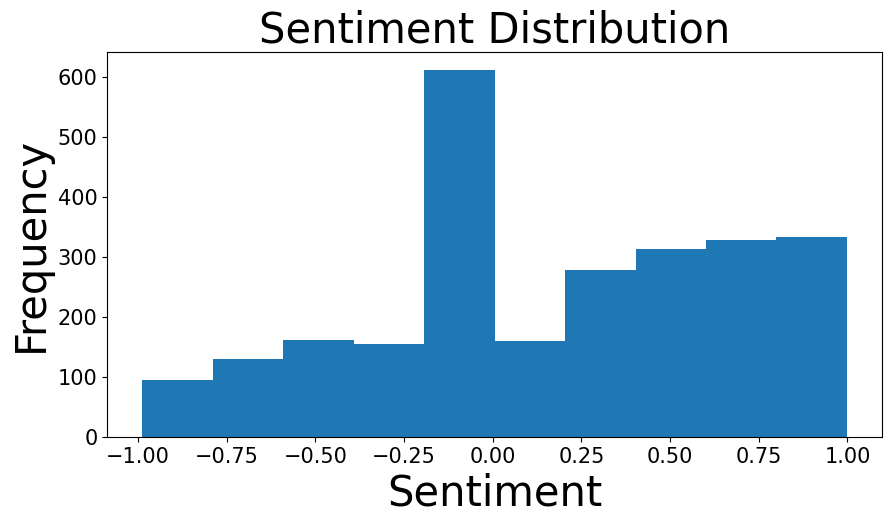

In [36]:
# Bar chart of the sentiment
plt.figure(figsize=(10,5))
plt.xlabel('Sentiment', fontsize=30)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=15)
plt.hist(reddit_data1['compound_score'], bins=10)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

In [37]:
reddit_data1

,comment,ups,downs,created,date_time,date,character_count,word_count,tokenized,polarity,subjectivity,sentiment_textblob,subjectivity2,compound_score,pos_score,neg_score,neu_score,sentiment_vader
0,following submission statement provided chrisd...,1,0,1.680011e+09,2023-03-28 13:43:44,2023-03-28,2023,303,"[follow, submiss, statement, provid, chrisdh79...",0.037885,0.421731,Positive Sentiment,Objective,0.9296,0.145,0.066,0.789,Positive Sentiment
1,think money shareholders could save highly pai...,6686,0,1.680011e+09,2023-03-28 13:41:09,2023-03-28,104,18,"[think, money, sharehold, could, save, highli,...",0.160000,0.540000,Positive Sentiment,Subjective,0.4939,0.286,0.000,0.714,Positive Sentiment
2,ideal world would lead increase leisure person...,503,0,1.680032e+09,2023-03-28 19:31:46,2023-03-28,301,53,"[ideal, world, would, lead, increas, leisur, p...",0.384091,0.575000,Positive Sentiment,Subjective,0.8979,0.384,0.056,0.560,Positive Sentiment
3,already looking update title connoisseur lmao,504,0,1.680015e+09,2023-03-28 14:42:25,2023-03-28,63,11,"[alreadi, look, updat, titl, connoisseur, lmao]",0.600000,1.000000,Positive Sentiment,Subjective,0.5994,0.438,0.000,0.562,Positive Sentiment
4,teams going turn teams real fast,250,0,1.680012e+09,2023-03-28 14:05:03,2023-03-28,55,13,"[team, go, turn, team, real, fast]",0.300000,0.900000,Positive Sentiment,Subjective,0.0000,0.000,0.000,1.000,Neutral Sentiment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,sounds like answers wise tell need,0,0,1.680098e+09,2023-03-29 13:52:21,2023-03-29,112,26,"[sound, like, answer, wise, tell, need]",0.700000,0.900000,Positive Sentiment,Subjective,0.6808,0.583,0.000,0.417,Positive Sentiment
2724,dont disagree anything wrote,0,0,1.680046e+09,2023-03-28 23:30:40,2023-03-28,46,8,"[dont, disagre, anyth, wrote]",0.000000,0.000000,Neutral Sentiment,Objective,0.2924,0.421,0.000,0.579,Positive Sentiment
2725,saying exponential curve technology could stil...,1,0,1.680094e+09,2023-03-29 12:49:45,2023-03-29,630,111,"[say, exponenti, curv, technolog, could, still...",0.059405,0.439127,Positive Sentiment,Objective,0.0000,0.135,0.135,0.729,Neutral Sentiment
2726,christ really upset quickly,1,0,1.680114e+09,2023-03-29 18:24:48,2023-03-29,37,6,"[christ, realli, upset, quickli]",0.266667,0.350000,Positive Sentiment,Objective,-0.4391,0.000,0.491,0.509,Negative Sentiment


In [38]:
# Create a function to map sentiment_vader to binary sentiment
def map_vader_sentiment(sentiment):
    if sentiment == 'Negative Sentiment':
        return 0
    elif sentiment == 'Positive Sentiment':
        return 1
    else:
        return None  # You can handle other cases if needed

# Apply the function to create the new column
reddit_data1['binary_sentiment_vader'] = reddit_data1['sentiment_vader'].apply(map_vader_sentiment)
reddit_data1

,comment,ups,downs,created,date_time,date,character_count,word_count,tokenized,polarity,subjectivity,sentiment_textblob,subjectivity2,compound_score,pos_score,neg_score,neu_score,sentiment_vader,binary_sentiment_vader
0,following submission statement provided chrisd...,1,0,1.680011e+09,2023-03-28 13:43:44,2023-03-28,2023,303,"[follow, submiss, statement, provid, chrisdh79...",0.037885,0.421731,Positive Sentiment,Objective,0.9296,0.145,0.066,0.789,Positive Sentiment,1.0
1,think money shareholders could save highly pai...,6686,0,1.680011e+09,2023-03-28 13:41:09,2023-03-28,104,18,"[think, money, sharehold, could, save, highli,...",0.160000,0.540000,Positive Sentiment,Subjective,0.4939,0.286,0.000,0.714,Positive Sentiment,1.0
2,ideal world would lead increase leisure person...,503,0,1.680032e+09,2023-03-28 19:31:46,2023-03-28,301,53,"[ideal, world, would, lead, increas, leisur, p...",0.384091,0.575000,Positive Sentiment,Subjective,0.8979,0.384,0.056,0.560,Positive Sentiment,1.0
3,already looking update title connoisseur lmao,504,0,1.680015e+09,2023-03-28 14:42:25,2023-03-28,63,11,"[alreadi, look, updat, titl, connoisseur, lmao]",0.600000,1.000000,Positive Sentiment,Subjective,0.5994,0.438,0.000,0.562,Positive Sentiment,1.0
4,teams going turn teams real fast,250,0,1.680012e+09,2023-03-28 14:05:03,2023-03-28,55,13,"[team, go, turn, team, real, fast]",0.300000,0.900000,Positive Sentiment,Subjective,0.0000,0.000,0.000,1.000,Neutral Sentiment,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,sounds like answers wise tell need,0,0,1.680098e+09,2023-03-29 13:52:21,2023-03-29,112,26,"[sound, like, answer, wise, tell, need]",0.700000,0.900000,Positive Sentiment,Subjective,0.6808,0.583,0.000,0.417,Positive Sentiment,1.0
2724,dont disagree anything wrote,0,0,1.680046e+09,2023-03-28 23:30:40,2023-03-28,46,8,"[dont, disagre, anyth, wrote]",0.000000,0.000000,Neutral Sentiment,Objective,0.2924,0.421,0.000,0.579,Positive Sentiment,1.0
2725,saying exponential curve technology could stil...,1,0,1.680094e+09,2023-03-29 12:49:45,2023-03-29,630,111,"[say, exponenti, curv, technolog, could, still...",0.059405,0.439127,Positive Sentiment,Objective,0.0000,0.135,0.135,0.729,Neutral Sentiment,NaN
2726,christ really upset quickly,1,0,1.680114e+09,2023-03-29 18:24:48,2023-03-29,37,6,"[christ, realli, upset, quickli]",0.266667,0.350000,Positive Sentiment,Objective,-0.4391,0.000,0.491,0.509,Negative Sentiment,0.0


In [39]:
# Filter out neutral sentiments
reddit_data_filtered = reddit_data1[~reddit_data1['sentiment_vader'].isin(['Neutral Sentiment'])]

In [ ]:
reddit_data_filtered

# **Word Cloud and Word Count**

##### All Sentiment Word Cloud + Counts

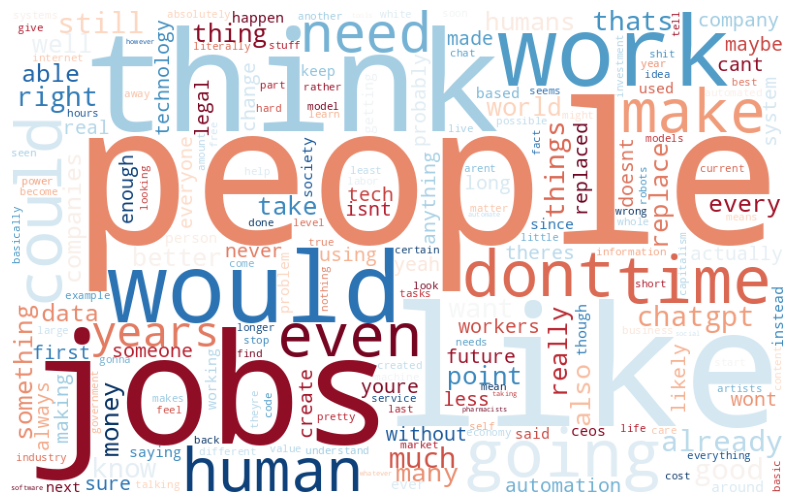

In [118]:
#all sentiment word cloud
from wordcloud import WordCloud       # To generate word clouds
import collections                    # Collections module is used to count the frequency of words.

all_words = ' '.join([text for text in reddit_data1['comment']])      # Concatenates all the text data into a single string
count_word = collections.Counter(all_words.split())                   # Tokenize the all_words and count their frequencies

#extra credit: different colors for each word cloud
wordcloud = WordCloud(width=800, height=500, background_color = 'white', colormap = 'RdBu')                          # width and height of the wordcloud in pixel
wordcloud.generate_from_frequencies(count_word)                       # generate the word cloud based on the word frequencies calculated earlier.
plt.figure(figsize=(10, 7))                                           # In inches
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [93]:
import itertools
import collections
#count the most words shown up in all_words
count_word = collections.Counter(all_words.split())
count_word.most_common(15)

[('people', 843),
 ('like', 588),
 ('jobs', 494),
 ('think', 410),
 ('would', 410),
 ('work', 404),
 ('going', 320),
 ('time', 312),
 ('could', 300),
 ('dont', 299),
 ('human', 272),
 ('make', 268),
 ('even', 267),
 ('need', 262),
 ('years', 240)]

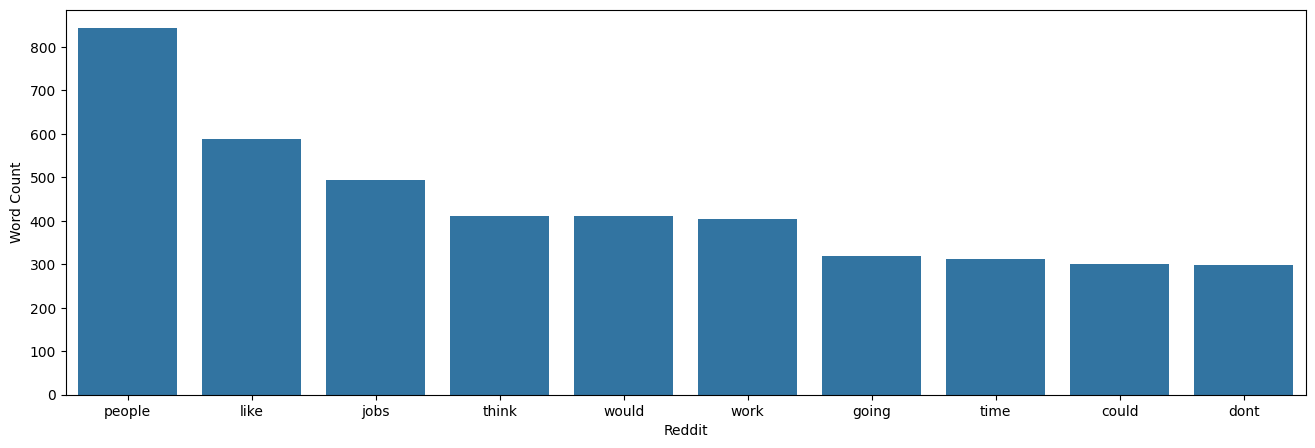

In [94]:
# Make a bar chart of the top 10 neutral words

a = nltk.FreqDist(count_word)                       # Create a frequency distribution a from the counted objects in word_count
d = pd.DataFrame({'Reddit': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent words
d = d.nlargest(columns="Count", n = 10)             # Select the top 10
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Reddit", y = "Count")
ax.set(ylabel = 'Word Count')                       # The code sets the label for the y-axis to 'Word Count'
plt.show()

##### Positive Sentiment Word Cloud + Counts

In [ ]:
#extra credit: word cloud for positive sentiment

In [95]:
reddit_data_pos = reddit_data_filtered[reddit_data_filtered['sentiment_vader'] == 'Positive Sentiment']

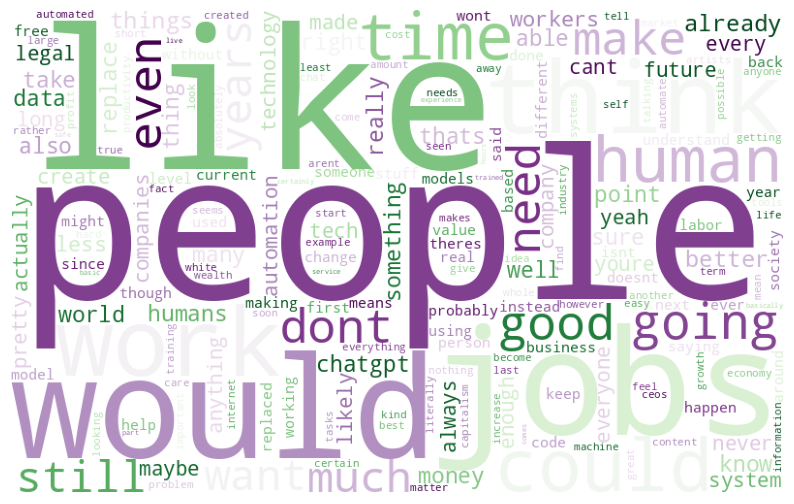

In [129]:
# pos binary sentiment word cloud
pos_all_words = ' '.join([text for text in reddit_data_pos['comment']])      # Concatenates all the text data into a single string
count_word1 = collections.Counter(pos_all_words.split())                   # Tokenize the all_words and count their frequencies

#extra credit: different colors for each word cloud
wordcloud = WordCloud(width=800, height=500, background_color = 'white', colormap ='PRGn')                          # width and height of the wordcloud in pixel
wordcloud.generate_from_frequencies(count_word1)                       # generate the word cloud based on the word frequencies calculated earlier.
plt.figure(figsize=(10, 7))                                           # In inches
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [97]:
import itertools
import collections
#count the most words shown up in all_words
count_word1 = collections.Counter(pos_all_words.split())
count_word1.most_common(15)

[('people', 541),
 ('like', 476),
 ('jobs', 316),
 ('would', 303),
 ('think', 280),
 ('work', 271),
 ('could', 230),
 ('time', 224),
 ('human', 210),
 ('going', 198),
 ('good', 190),
 ('even', 186),
 ('make', 183),
 ('dont', 183),
 ('need', 178)]

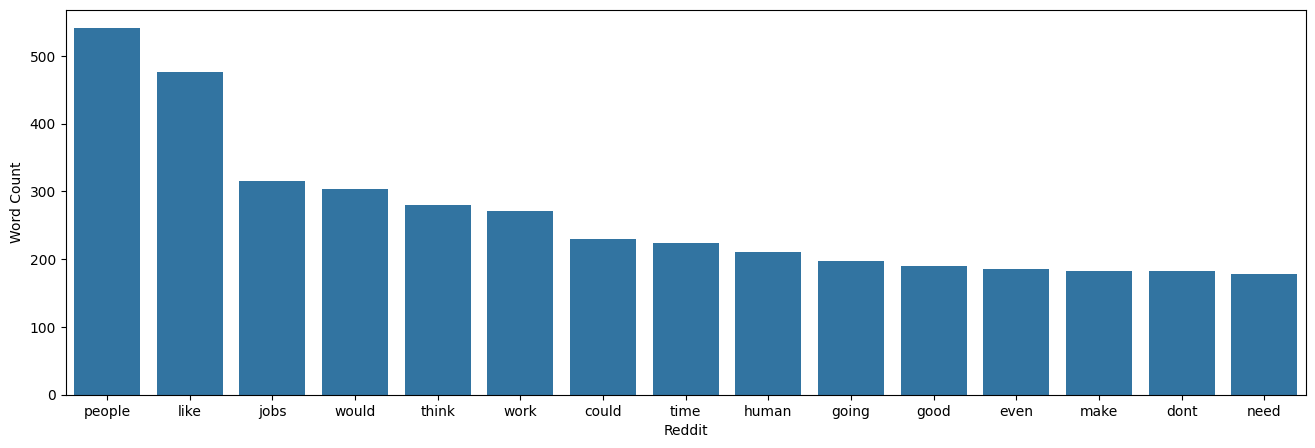

In [98]:
# Make a bar chart of the top 10 neutral words

# Importing seaborn
import seaborn as sns

a = nltk.FreqDist(count_word1)                       # Create a frequency distribution a from the counted objects in word_count
d = pd.DataFrame({'Reddit': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent words
d = d.nlargest(columns="Count", n = 15)             # Select the top 10
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Reddit", y = "Count")
ax.set(ylabel = 'Word Count')                       # The code sets the label for the y-axis to 'Word Count'
plt.show()

##### Negative Sentiment Word Cloud + Counts

In [ ]:
#extra credit: word cloud for negative sentiment

In [99]:
reddit_data_neg = reddit_data_filtered[reddit_data_filtered['sentiment_vader'] == 'Negative Sentiment']

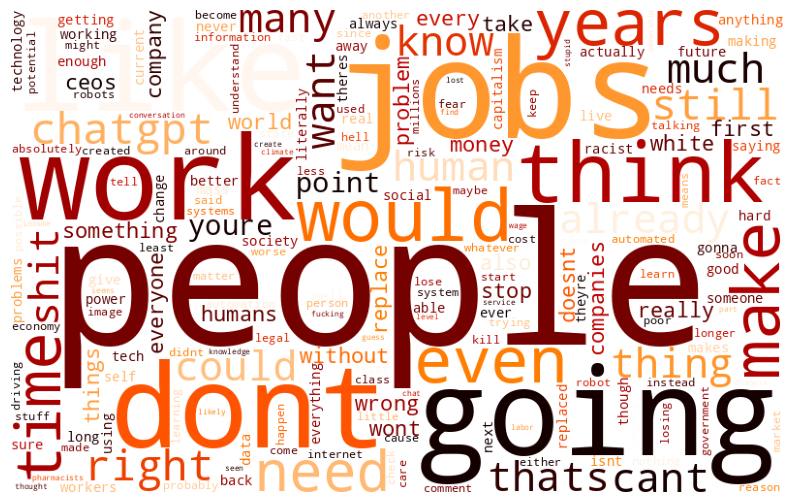

In [124]:
# neg binary sentiment word cloud
neg_all_words = ' '.join([text for text in reddit_data_neg['comment']])      # Concatenates all the text data into a single string
count_word2 = collections.Counter(neg_all_words.split())                   # Tokenize the all_words and count their frequencies

#extra credit: different colors for each word cloud
wordcloud = WordCloud(width=800, height=500, background_color = 'white', colormap ='gist_heat_r')                          # width and height of the wordcloud in pixel
wordcloud.generate_from_frequencies(count_word2)                       # generate the word cloud based on the word frequencies calculated earlier.
plt.figure(figsize=(10, 7))                                           # In inches
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [101]:
#count the most words shown up in neg_all_words
count_word2 = collections.Counter(neg_all_words.split())
count_word2.most_common(15)

[('people', 236),
 ('jobs', 121),
 ('like', 95),
 ('going', 93),
 ('dont', 85),
 ('work', 85),
 ('think', 79),
 ('would', 73),
 ('make', 62),
 ('years', 59),
 ('even', 59),
 ('time', 57),
 ('need', 56),
 ('chatgpt', 54),
 ('still', 51)]

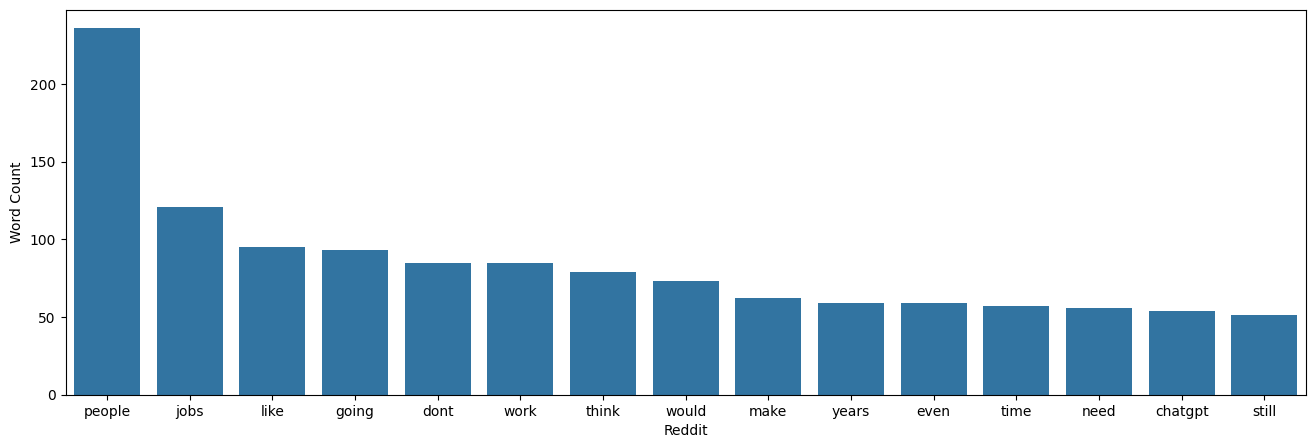

In [102]:
# Make a bar chart of the top 10 neg words

a = nltk.FreqDist(count_word2)                       # Create a frequency distribution a from the counted objects in word_count
d = pd.DataFrame({'Reddit': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent words
d = d.nlargest(columns="Count", n = 15)             # Select the top 10
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Reddit", y = "Count")
ax.set(ylabel = 'Word Count')                       # The code sets the label for the y-axis to 'Word Count'
plt.show()

##### extra credit

In [ ]:
# other extra credit within pos & neg sentiment word clouds + counts

In [193]:
import plotly.express as px

# Convert the Counter objects to dictionaries
word_freq_pos = dict(count_word1.most_common(10))
word_freq_neg = dict(count_word2.most_common(10))

# Create a DataFrame from the dictionaries
df_pos = pd.DataFrame(list(word_freq_pos.items()), columns=['Word', 'Frequency'])
df_neg = pd.DataFrame(list(word_freq_neg.items()), columns=['Word', 'Frequency'])

# Plot the bar chart for positive sentiment
fig_pos = px.bar(df_pos, x='Word', y='Frequency', title='Top 10 Words in Positive Sentiment', color='Frequency', color_continuous_scale = 'Viridis_r')
fig_pos.show()

# Plot the bar chart for negative sentiment
fig_neg = px.bar(df_neg, x='Word', y='Frequency', title='Top 10 Words in Negative Sentiment', color='Frequency', color_continuous_scale = 'Magma_r')
fig_neg.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# **Predictive Analysis**

In [103]:
# sklearn only

In [ ]:
reddit_data_filtered

In [105]:
# Select features (X) and the target variable (y)
X = reddit_data_filtered[['ups', 'word_count', 'character_count']]
y = reddit_data_filtered['binary_sentiment_vader']

In [106]:
# importing necessary functions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Spliting the data into training data and testing data
# The training dataset is used to build the logistic model, while the testing dataset is used to evaluate the model.

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 0.7, # This is the proportion of the dataset to include in the train split. If none, it will be automatically set to 0.25
    random_state = 16, # This is set to control the shuffling applied to the data before spliting it. It helps to make the work reproducible
)

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Train the model
clf.fit(X_train, y_train)

# Access and print the coefficients and intercept
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

# Make predictions on new data (X_test)
y_pred = clf.predict(X_test)

Coefficients: [[ 3.37414866e-05  2.88106933e-02 -4.17574542e-03]]
Intercept: [0.47888044]


In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

In [108]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6929392446633826


In [109]:
# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.6947194719471947


In [110]:
# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9952718676122931


In [111]:
# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.8182701652089407


In [112]:
# Print a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.33      0.01      0.01       186
         1.0       0.69      1.00      0.82       423

    accuracy                           0.69       609
   macro avg       0.51      0.50      0.41       609
weighted avg       0.58      0.69      0.57       609



In [113]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  1, 185],
       [  2, 421]])

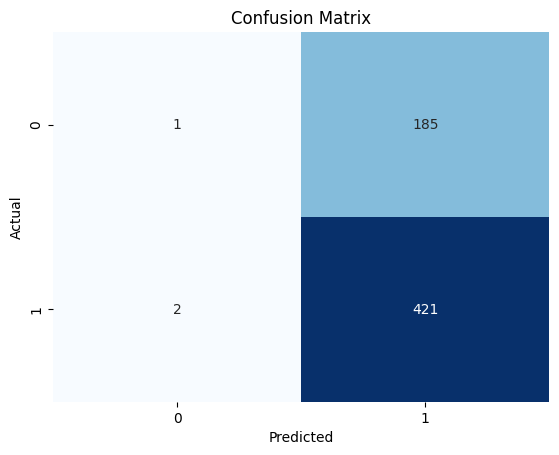

In [114]:
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', cbar=False) # plot heatmap using seaborn
plt.xlabel('Predicted') # x label name
plt.ylabel('Actual') # y label name
plt.title('Confusion Matrix') # cm name
plt.show() # displays plot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



ROC AUC Score: 0.5660349780116425


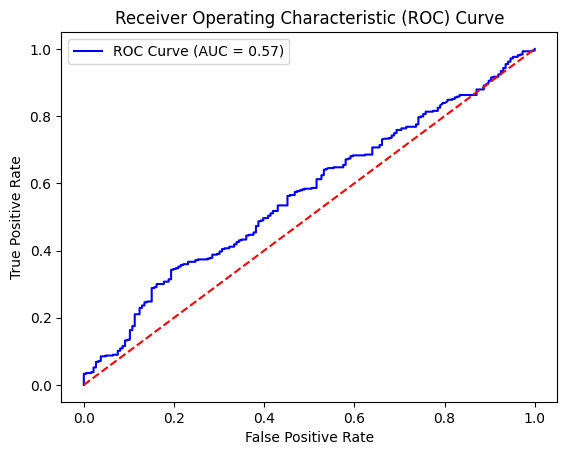

In [194]:
# Calculate predicted probabilities
y_pred_proba = clf.predict_proba(X_test)[:,1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# extra credit:

In [ ]:
# other extra credit in the "Word Cloud and Word Count" section

In [ ]:
# the following code adds a layer of analysis to my project by uncovering some topics that repetitvely appear in the comments of the post i am examining.
# this helps also realize what words are associated and allow for further exploration/understanding of themes : )

In [ ]:
reddit_data1

In [191]:
# Necessary classes from modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Get the tokenized words data column from reddit_data1
tokenized_words = reddit_data1['tokenized']

# joins the tokenized words into strings to represent each comment
tokenized_text = [' '.join(words) for words in tokenized_words]

# Create a CountVectorizer to convert the text data into a document-term matrix
vectorizer = CountVectorizer(max_features=1000) #max_features = 1000 limits to consider top 1000 most frequent words
X = vectorizer.fit_transform(tokenized_text) # fits the vectorizer to the text data and transforms it into a document term matrix, each row is a document, each column is a word

# Apply LDA model
num_topics = 4  # Specifying the number of topics to identify in the data
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42) # creates a LDA objext and sets number of topics of model and random state = 42 for reproducibility
lda_model.fit(X) # fits LDA model to document-term matrix (X) -- this trains the model to find the topics in the comment data

# Print top words associated with each topic
feature_names = vectorizer.get_feature_names_out() # gets the words from the vectorizer and assigns them to feature name
for topic_idx, topic in enumerate(lda_model.components_): # loops over each topic and their index
    print(f"Topic {topic_idx + 1}:") #prints the current topic index number
    top_words_idx = topic.argsort()[:-11:-1] # identifies the top 10 words associated with the current topic
    top_words = [feature_names[i] for i in top_words_idx] # retrieve words associated with top word indices
    print(top_words) # prints all the top words associated with the current topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic 1:
['work', 'peopl', 'compani', 'need', 'make', 'like', 'would', 'money', 'replac', 'thing']
Topic 2:
['human', 'peopl', 'work', 'like', 'know', 'make', 'right', 'think', 'time', 'compani']
Topic 3:
['peopl', 'job', 'think', 'like', 'go', 'world', 'work', 'technolog', 'time', 'thing']
Topic 4:
['like', 'human', 'job', 'chatgpt', 'autom', 'need', 'model', 'peopl', 'would', 'could']
